# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer:  We would like to explore the association between student admission (admit=1) and the following variables: gre = GRE score, gpa = Grade Point Average and rank/prestige = applicant's undergraduate alma mater based on the following alternative hypotheses:

There is a positive relationship between admissions into a graduate school (admit=1) and GRE score (high gre)

There is a positive relationship between admissions into a graduate school (admit=1) and GPA score (high gpa)

The is a negative relationship between the number of admissions into a graduate schoool (admit=1) and the prestige (or rank) of school (high rank or prestige)

For this, we'll be using the same dataset as UCLA's Logistic Regression as explained in [yhat's blog](http://blog.yhat.com/posts/logistic-regression-and-python.html) and the tecnique of choice for the analysis will be logistic regression in Python.

###Our goal will be to identify the various factors that may influence admission into graduate school. It contains four variables- admit, gre, gpa, rank.

- 'admit' is a binary variable. It indicates whether or not a candidate was admitted admit =1) our not (admit= 0)
- 'gre' is GRE score
- 'gpa' stands for Grade Point Average
- 'rank' is the rank of an applicant's undergraduate alma mater, with 1 being the highest and 4 as the lowest ####

The success of this project will mean that the relationship between admissions and any of the variables stated exists.

The project will be documented in my personal repo linked 'here' and expect to be delivered on by 18th Jul EOD.


Assumptions: 
We assume that the collected data is valid and hasn't changed massively since collection. 
We assume that the student implementing this analysis has completed project 1, 2 and 3 of Data Science course and therefore has access to the previous analysis implemented on the dataset and documentation.
We assume it is acceptble to implement some degree of manipulation on the data set (like removing missing observations) for leaning purposes considering time constrains for delivery and others

Risks: 
The dataset could have been modified by the authors since last time it was explored and preliminar analysis could be off because of it at today's date
The student implementing this analysis could have missed the whole point of project 4 and not deliver the expected outcome and/or miss the delivery date

### Dataset:  Write up a description of your data and any cleaning that was completed

In [68]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model


In [69]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print (df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [70]:
#Exploring our data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [71]:
# Dropping NANs point and assigning to new dataframe
df = df_raw.dropna()

In [72]:
# Checking the missing values are gone
df.describe()
df.isnull().values.any()



False

In [22]:
#Spot checking my data
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


Answer: My data initially shown 400 entries across 4 columns but some observations were missing across gre, gpa and prestige variables.
Therefore the missing values were dropped while trying to align our dataset. After the cleaning we ended up with 397 observations in our dataset and no nulls.
Our data types are integer for admit while the rest of variables (gre, gpa and prestige) show as floats.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [73]:
# Having a quick look at data with descriptive statistics 
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


### Methods: Write up the methods used in your analysis

In [74]:
# More exploratory analysis (correlation)
df.corr()

# More exploratory analysis (skewness)  
#df_raw.skew()

# More exploratory analysis (Kurtosis)  
#df_raw.kurt()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014560C63E10>,
      dtype=object)

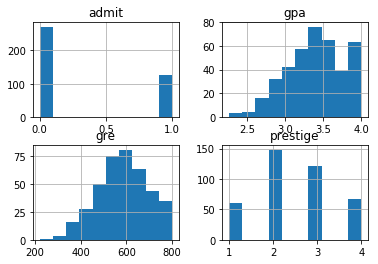

In [26]:
# Plotting data to see how data is distributed
df.hist()

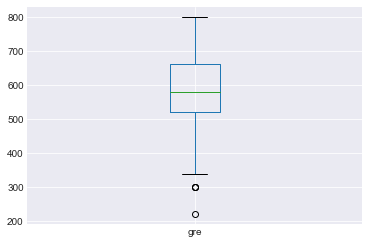

In [75]:
#boxplots

df['gre'].plot(kind='box')
#df['gpa'].plot(kind='box')
#df['prestige'].plot(kind='box')

# scatter plot
#df_cleaned.plot(kind='scatter', x='gre', y='gpa')

# scatter matrix of the two columns
#pd.plotting.scatter_matrix(df_cleaned[['gre', 'gpa']])

In [131]:
# frequency table for prestige and whether or not someone was admitted
print (pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


          prestige       gre       gpa     admit
prestige  1.000000 -0.124533 -0.060976 -0.243563
gre      -0.124533  1.000000  0.382408  0.181202
gpa      -0.060976  0.382408  1.000000  0.174116
admit    -0.243563  0.181202  0.174116  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


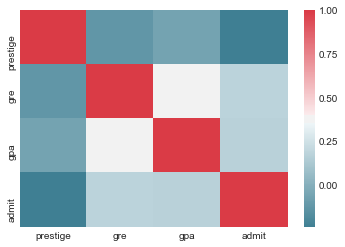

In [78]:
#Comparing variables for multicollinearity
#No high correlations found between variables but this is a singular matrix so we can have multicollinarity issues

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['prestige', 'gre', 'gpa','admit']].corr()
print (correlations)
print (sns.heatmap(correlations, cmap=cmap))

In [81]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print (data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


In [82]:
#Adding a constant term for our Logistic Regression
data['intercept'] = 1.0

In [84]:
#Setting the covariates to a variable called train_cols

train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

In [85]:
#Model fitting
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [86]:
#Printing results
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                 0.08166
Time:                        18:42:15   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

In [95]:
#Calculate the odds ratio of the coeffiencents and their 95% CI intervals

print (np.exp(result.params))

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [96]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


In [120]:
#Evaluating our classifier (recreate the dataset with every logical combination of input values)

# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])



[220.         284.44444444 348.88888889 413.33333333 477.77777778
 542.22222222 606.66666667 671.11111111 735.55555556 800.        ]
[2.26       2.45333333 2.64666667 2.84       3.03333333 3.22666667
 3.42       3.61333333 3.80666667 4.        ]


In [129]:
# recreate the dummy variables
#d = pd.get_dummies(df_all['pres'], prefix = 'pres')
#d.drop(labels = ['pres_1'], axis = 1, inplace = True)

#df_mat = df_all.join(d).drop(labels = ['pres', 'int'], axis = 1)
#x_new = sm.add_constant(df_mat, prepend = False)
#x_new.head()

import itertools
l1 = list(itertools.product(gres, gpas, [1,2,3,4], [1.0]))
df_all = pd.DataFrame(l1, columns = ['gre', 'gpa', 'pres', 'int'])
df_all.head()

d = pd.get_dummies(df_all['pres'], prefix = 'pres')
d.drop(labels = ['pres_4'], axis = 1, inplace = True)
df_mat = df_all.join(d).drop(labels = ['pres', 'int'], axis = 1)
x_new = sm.add_constant(df_mat, prepend = False)
x_new.head()

,gre,gpa,pres_1,pres_2,pres_3,const
0,220.0,2.260000,1,0,0,1.0
1,220.0,2.260000,0,1,0,1.0
2,220.0,2.260000,0,0,1,1.0
3,220.0,2.260000,0,0,0,1.0
4,220.0,2.453333,1,0,0,1.0


In [130]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'pres', 'const']
x_new = x_new[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])


### NOT SURE HOW TO TROUBLESHOOT HERE, CAN'T TELL HOW TO GO FROM PRES_ DUMMIES TO PRESTIGE VARIABLE


KeyError: "['pres'] not in index"

In [108]:
combos['admit_pred'] = result.predict(combos[train_cols])

print (combos.tail())
len(combos)


### NOT SURE HOW TO TROUBLESHOOT HERE

KeyError: "Index(['prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept'], dtype='object') not in index"

Answer:

### Results: Write up your results

Answer:

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: 